In [67]:
import numpy as np
import pandas as pd
import spacy

new_headers = ['Component','Failure mode','Provision']
df = pd.read_csv('Downloads/excelexemple.csv')
dataset = pd.DataFrame(df, columns=new_headers)
dataset

,Component,Failure mode,Provision
0,Rudder bearing,Seizure,Stop vessel
1,Rudder bearing,Breakage,Stop vessel
2,Rudder bearing,Structure failure,Use beams
3,Main engine,Loss of output,None
4,Main engine,Auto shutdown,Anchor
5,Shafter and propeller,Shaft breakage,Anchor
6,Shafter and propeller,Shaft seizure,Anchor
7,Shafter and propeller,Gearbox seizure,Anchor
8,Shafter and propeller,Hydraulic failure,Anchor
9,Shafter and propeller,Propulsion blade failure,Slow steaming


In [95]:
len(dataset)

21

In [88]:
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(dataset.iloc[0,0])

# Print each token separately
for token in doc:
    print(token.text,'\t', token.pos_, '\t',token.dep_ ,'\t', token.lemma, '\t', token.lemma_)
    
# case 17 1
doc = nlp(dataset.iloc[17,1])

# Print each token separately
for token in doc:
    print(token.text,'\t', token.pos_,'\t', token.dep_ , token.lemma, '\t', token.lemma_)
# case 12 2    
doc = nlp(dataset.iloc[12,2])

# Print each token separately
for token in doc:
    print(token.text,'\t', token.pos_,'\t', token.dep_ , token.lemma, '\t', token.lemma_)    
    

Rudder 	 NOUN 	 compound 	 12944482289043003124 	 rudder
bearing 	 VERB 	 ROOT 	 3737373500888618661 	 bear
No 	 DET 	 det 13055779130471031426 	 no
fuel 	 NOUN 	 ROOT 10593011667301193077 	 fuel
to 	 ADP 	 prep 3791531372978436496 	 to
M 	 PROPN 	 nmod 3209455878668673793 	 M
/ 	 SYM 	 punct 2466615745961202537 	 /
E 	 NOUN 	 pobj 1720370409040345145 	 e
Use 	 VERB 	 ROOT 6873750497785110593 	 use
emergency 	 NOUN 	 dobj 7905763179979760259 	 emergency
24 	 NUM 	 nummod 17682212845846644677 	 24
V 	 NOUN 	 dobj 2482183445564601373 	 v


In [89]:
spacy.explain('nmod')

'modifier of nominal'

In [62]:
from wordcloud import WordCloud
data = open("Downloads/excelexemple.csv").read()

wordcloud = WordCloud().generate(data)

(-0.5, 399.5, 199.5, -0.5)

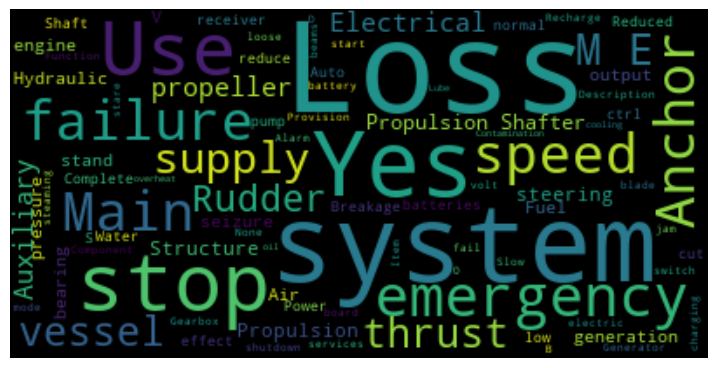

In [68]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [9]:
dataset.dtypes

Component       object
Failure mode    object
Provision       object
dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=dataset.iloc[:,0]
#corpus
#  TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())


C:\Users\snh28\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,air,and,batteries,bearing,board,emergency,engine,fuel,generation,hydraulic,...,main,oil,power,propeller,receiver,rudder,shafter,switch,system,water
0,0.000000,0.00000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.769748,0.000000,0.000000,0.0,...,0.638348,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.769748,0.000000,0.000000,0.0,...,0.638348,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
6,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
7,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
8,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000
9,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=dataset.iloc[:,1]
#corpus
#  TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())


C:\Users\snh28\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,air,auto,blade,breakage,complete,contamination,cooling,fail,failure,fuel,...,pressure,propulsion,seizure,shaft,shutdown,stare,structure,system,to,water
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.622788,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.78239,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,0.000000,0.707107,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.670547,0.741867,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.622788,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.622788,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.616202,0.000000,0.000000,0.0,0.000000,0.000000,0.490501,0.000000,...,0.000000,0.616202,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=dataset.iloc[:,2]
#corpus
#  TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

C:\Users\snh28\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,24,anchor,beams,by,emergency,generation,none,normal,pump,receiver,recharge,slow,stand,steaming,stop,supply,use,vessel
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.707107
2,0.000000,0.0,0.873491,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.486840,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000
